# Real Estate Price Prediction

## Project Overview
This project applies supervised machine learning to predict residential property values. Accurate price estimation is important for buyers, sellers, and analysts seeking to understand housing market dynamics. The analysis focuses on identifying key factors that influence housing prices and evaluating predictive performance using interpretable regression models.


## Problem Statement
The objective of this project is to predict residential property prices based on structural and location-related features. This is a supervised regression problem where the target variable represents the house price per unit area.
Model performance is evaluated using error-based metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE), which quantify prediction accuracy in real-world pricing units.

## Dataset
The dataset came from the UCI Machine Learning Repository and was originally collected from Sindian Dist., New Taipei City, Taiwan. It represents historical house price values from that area alongside structural and location-related features such as house age, distance to the nearest MRT station, and latitude and longitude.


## Data Loading and Inspection

 Import necessary libaries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Upload dataset and display first few and last few rows.

In [5]:
real_estate_data = pd.read_excel('/content/Real estate valuation data set.xlsx')
real_estate_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [6]:
real_estate_data.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


## Exploratory Data Analysis
Get more information about the dataset

In [7]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


This dataset is relatively small since it contains just 414 rows and 8 columns. Check for missing values

In [8]:
real_estate_data.isnull().sum()

,0
No,0
X1 transaction date,0
X2 house age,0
X3 distance to the nearest MRT station,0
X4 number of convenience stores,0
X5 latitude,0
X6 longitude,0
Y house price of unit area,0


No null values present. It is now necessary to visualize the distribution of the data.

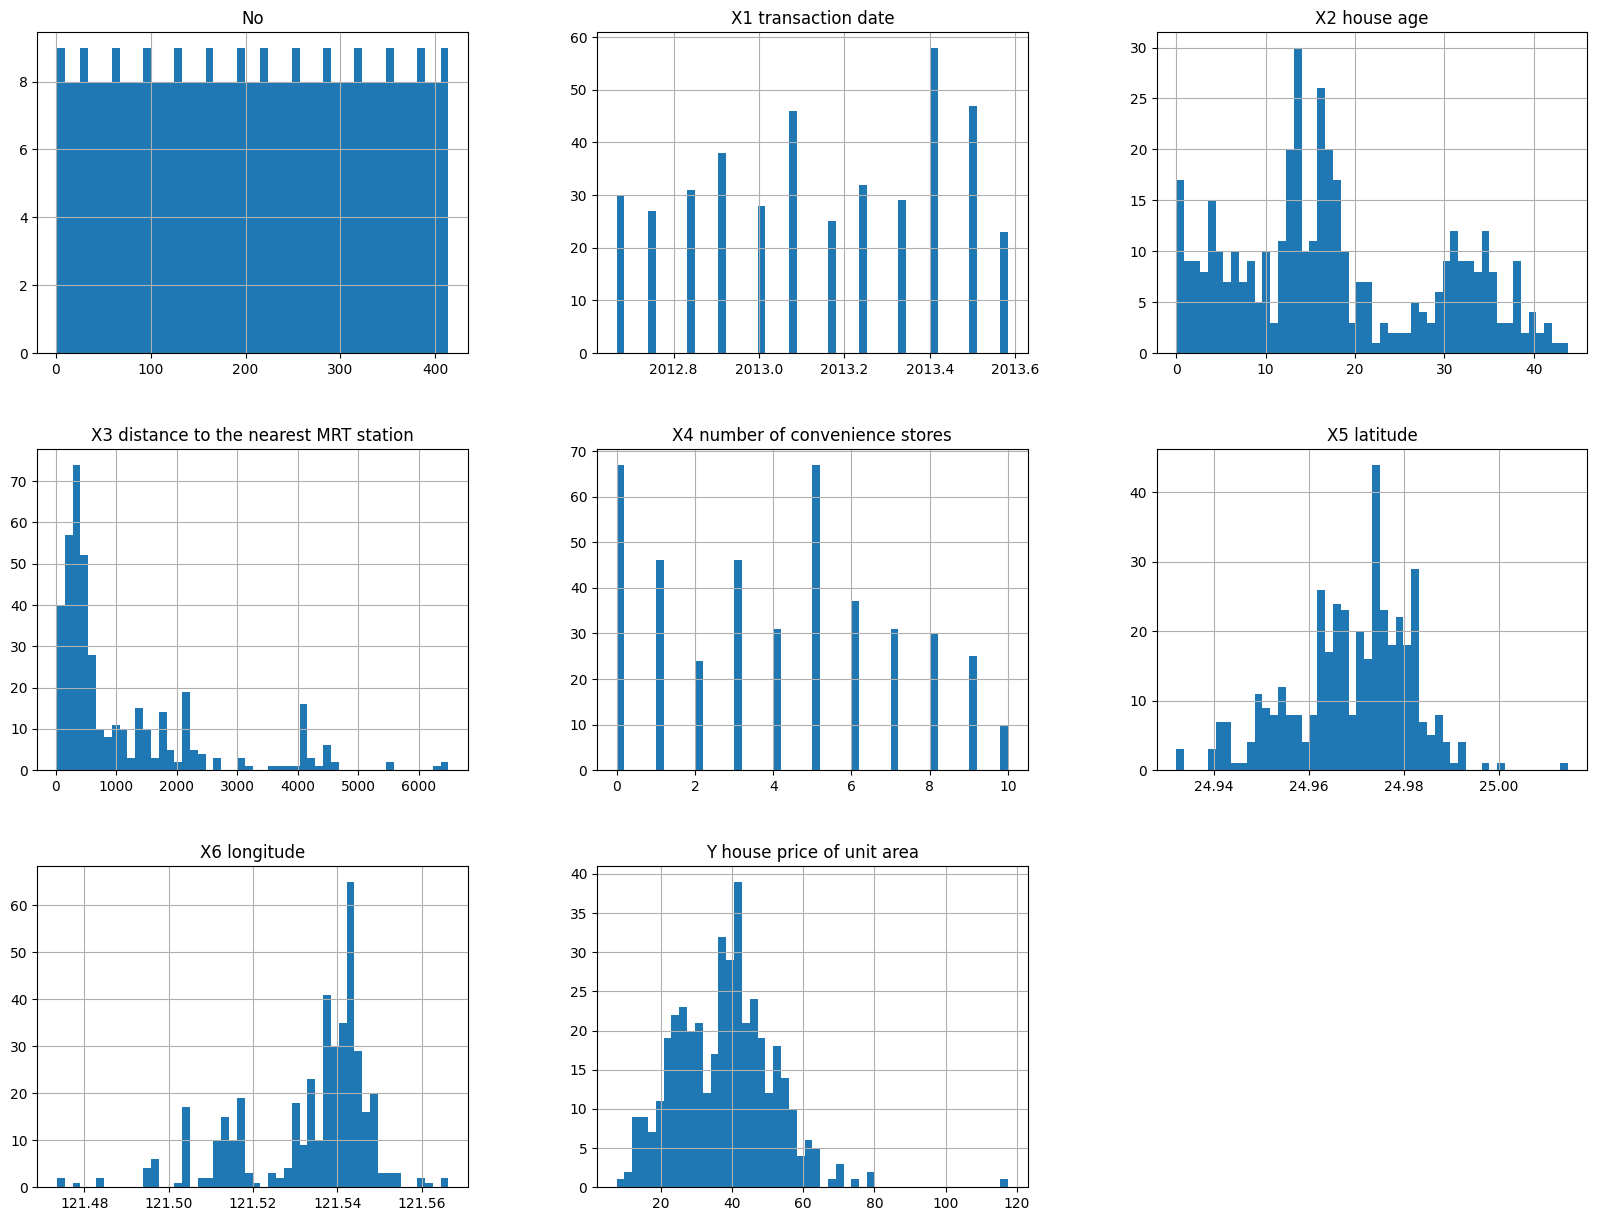

In [10]:
real_estate_data.hist(bins=50, figsize=(20,15))
plt.show()

The `No` column serves only as an identifier that labels each observation and does not contain predictive information; therefore, it is excluded from modeling. The transaction date feature indicates that the dataset spans approximately from 2012 to 2013 and is encoded as a fractional year, which is treated as a continuous temporal variable.

Several predictors exhibit skewed distributions. Distance to the nearest MRT station and house age show right-skewed patterns, while geographic features such as longitude display mild left skew. The target variable (house price per unit area) also exhibits moderate skewness with a small number of higher-priced observations.

These distributional characteristics suggest that while linear regression can provide an interpretable baseline, nonlinear relationships and threshold effects may be present, motivating the inclusion of a decision tree model for comparison.


## Modeling Approach
Given the distributional characteristics of the dataset, it is necessary to use the Decision Tree model to capture nonlinear relationships and threshold effects as well as a Linear Regression model for baseline comparison. The data would need to be split into training and test sets in order for this modeling to happen. The metrics that will be used to evaluate model effectiveness are mean absolute error and root mean squared error. Mean absolute error reflects typical prediction error while root mean squared error penalizes larger errors more heavily, providing insight into the model's sensitivity.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [11]:
X = real_estate_data.drop(['No','Y house price of unit area'], axis=1)
y = real_estate_data["Y house price of unit area"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling Evaluation
Train the models and calculate both mean absolute error and root mean squared error for testing and training sets. Do cross-validation as well as to measure generalizability.

In [20]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
linear_regression_predictions_training = linear_regression_model.predict(X_train)
decision_tree_predictions_training = decision_tree_model.predict(X_train)
linear_regression__training_mae = mean_absolute_error(y_train, linear_regression_predictions_training)
decision_tree_training_mae = mean_absolute_error(y_train, decision_tree_predictions_training)
linear_regression__training_rmse = root_mean_squared_error(y_train, linear_regression_predictions_training)
decision_tree_training_rmse = root_mean_squared_error(y_train, decision_tree_predictions_training)

In [19]:
linear_regression_predictions_test = linear_regression_model.predict(X_test)
decision_tree_predictions_test = decision_tree_model.predict(X_test)
linear_regression_test_mae = mean_absolute_error(y_test, linear_regression_predictions_test)
decision_tree_test_mae = mean_absolute_error(y_test, decision_tree_predictions_test)
linear_regression_test_rmse = root_mean_squared_error(y_test, linear_regression_predictions_test)
decision_tree_test_rmse = root_mean_squared_error(y_test, decision_tree_predictions_test)

In [21]:
from sklearn.model_selection import cross_val_score
linear_regression_scores_cv_mae = cross_val_score(linear_regression_model, X_train, y_train, cv=5,scoring='neg_mean_absolute_error')
decision_tree_scores_cv_mae = cross_val_score(decision_tree_model, X_train, y_train, cv=5,scoring='neg_mean_absolute_error')
linear_regression_scores_cv_rmse = cross_val_score(linear_regression_model, X_train, y_train, cv=5,scoring='neg_root_mean_squared_error')
decision_tree_scores_cv_rmse = cross_val_score(decision_tree_model, X_train, y_train, cv=5,scoring='neg_root_mean_squared_error')



## Results and Interpretation
Tabulate the observed results.

In [22]:
Table = pd.DataFrame({"Model": ["Linear Regression", "Decision Tree"],
                      "Training MAE": [linear_regression__training_mae, decision_tree_training_mae],
                      "Training RMSE": [linear_regression__training_rmse, decision_tree_training_rmse],
                      "Test MAE": [linear_regression_test_mae, decision_tree_test_mae],
                      "Test RMSE": [linear_regression_test_rmse, decision_tree_test_rmse],
                      "CV MAE": [-linear_regression_scores_cv_mae.mean(), -decision_tree_scores_cv_mae.mean()],
                      "CV RMSE": [-linear_regression_scores_cv_rmse.mean(), -decision_tree_scores_cv_rmse.mean()]})

Table


,Model,Training MAE,Training RMSE,Test MAE,Test RMSE,CV MAE,CV RMSE
0,Linear Regression,6.339705,9.116522,5.305233,7.314523,6.444827,9.179017
1,Decision Tree,0.126586,0.670516,5.853012,8.105673,6.123003,10.567789


The linear regression model exhibits relatively consistent performance across training, test, and cross-validation sets, indicating stable generalization with limited variance. However, its higher error values suggest that linear assumptions may not fully capture the underlying price relationships.

The decision tree model achieves near-perfect performance on the training set but performs substantially worse on the test and cross-validation sets. This discrepancy indicates overfitting, as the model captures noise in the training data rather than generalizable patterns. This behavior highlights the bias-variance tradeoff between simpler and more flexible models.


## Limitations

The model does not incorporate macroeconomic factors such as interest rates. Location variables are limited to those available in the dataset. External shocks and market cycles are not explicitly modeled. As a result, predictions should be interpreted as estimates rather than exact valuations.



## Conclusion
Both the Decision Tree and Linear Regression models perform relatively well at predicting house prices given that the errors are  small compared to the target variable's range. However, without any fine-tuning, the Decision Tree model significantly overfits on the dataset (the training error is drastically less than the test and cross validation error) compared to the Linear Regression model. Next steps could include hyperparameter tuning of the Decision Tree model, exploring regularized regression techniques, and applying the analysis to a larger dataset. These steps would help improve model robustness and ensure more reliable and generalizable price predictions.